# Timesfm Usage Example

## Loading TinyTimeMixer Model

In [1]:
import numpy as np
import os
import sys

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)
print(f"src_path: {src_path}")

from samay.model import TinyTimeMixerModel
from samay.dataset import TinyTimeMixerDataset
from samay.utils import load_args

arg_path = "../config/tinytimemixer.json"
args = load_args(arg_path)
ttm = TinyTimeMixerModel(**args)


src_path: /nethome/sli999/Samay/src


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


## Define the datasets

In [2]:
train_dataset = TinyTimeMixerDataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv', 
                             mode='train', batch_size=64, context_len=512, horizon_len=96)
val_dataset = TinyTimeMixerDataset(name="ett", datetime_col='date', path='../data/data/ETTh1.csv',
                             mode='test', batch_size=64, context_len=512, horizon_len=96)


## Evaluate the zero-shot forecasting

In [ ]:
metrics = ttm.evaluate(val_dataset, metric_only=True)
print(metrics)

(462, 7, 96) (462, 7, 96) (462, 7, 512)
{'mse': 9.531482, 'mae': 1.6833216, 'mase': 1.7621224, 'mape': 1049.9802, 'rmse': 3.0873098, 'nrmse': 0.06723380847098956, 'smape': 0.4409384, 'msis': 0.05309491, 'nd': 0.4522242285302642}


## Visualization of the evaluation

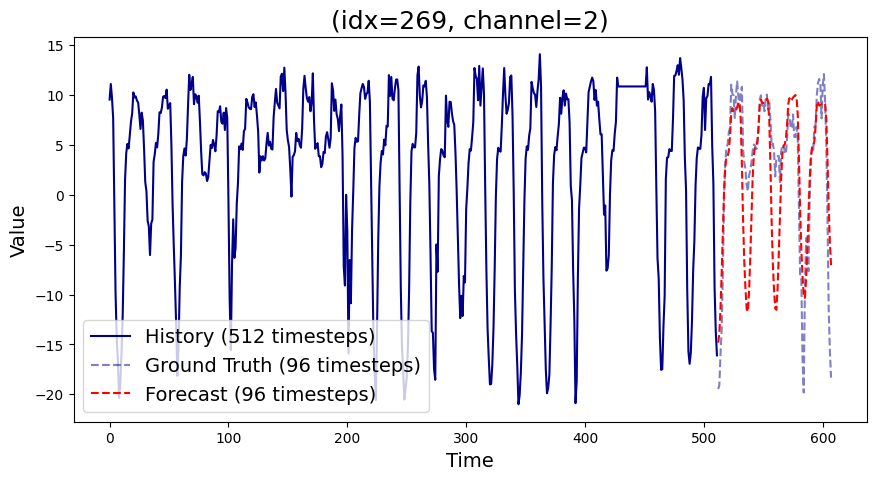

In [4]:
# import matplotlib.pyplot as plt

# # Pick a random channel and time index
# trues = np.array(trues)
# preds = np.array(preds)
# histories = np.array(histories)
# channel_idx = np.random.randint(0, trues.shape[1]) 
# time_index = np.random.randint(0, trues.shape[0]) 

# history = histories[time_index, channel_idx, :] 
# true = trues[time_index, channel_idx, :]
# pred = preds[time_index, channel_idx, :]

# plt.figure(figsize=(12, 4))

# # Plotting the first time series from history
# plt.plot(range(len(history)), history, label='History (128 timesteps)', c='darkblue')

# # Plotting ground truth and prediction
# num_forecasts = len(true)

# offset = len(history)
# plt.plot(range(offset, offset + len(true)), true, label='Ground Truth (64 timesteps)', color='darkblue', linestyle='--', alpha=0.5)
# plt.plot(range(offset, offset + len(pred)), pred, label='Forecast (64 timesteps)', color='red', linestyle='--')

# plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
# plt.xlabel('Time', fontsize=14)
# plt.ylabel('Value', fontsize=14)
# plt.legend(fontsize=14)
# plt.show()
ttm.plot(val_dataset)

## Finetune Timesfm Model on the ETT dataset

In [5]:
finetuned_model = ttm.finetune(train_dataset)

Epoch 0, Loss: 5.740216328547551
Epoch 1, Loss: 5.553980057056133
Epoch 2, Loss: 5.44788331251878
Epoch 3, Loss: 5.374182811150184
Epoch 4, Loss: 5.302513085878813


## Test the Finetuned Model

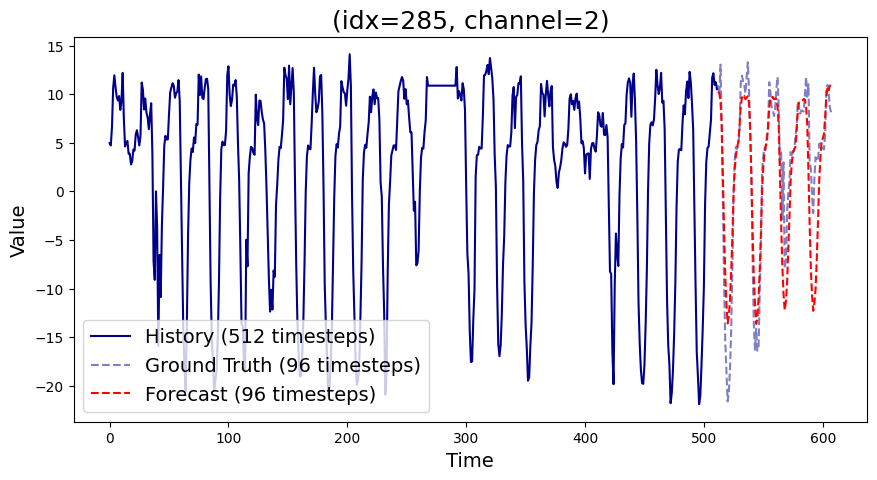

In [6]:
# avg_loss, trues, preds, histories = tfm.evaluate(val_dataset)
# print("Validation loss:", avg_loss)
ttm.plot(val_dataset)